#    .................. Indian Premier League ~ IPL ...............

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:\\Projects on data analytics\\IpL\\archive\\IPL Ball-by-Ball 2008-2020.csv')
matches=pd.read_csv('D:\\Projects on data analytics\\IpL\\archive\\IPL Matches 2008-2020.csv')

In [3]:
data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

### Total players

In [7]:
bow=data['bowler'].unique()
bat=data['batsman'].unique()
print('Total players in IPL',len(set(list(bow)+list(bat))))

Total players in IPL 580


### Player Statistics

In [8]:
def count(df,runs):
    return len(df[df['batsman_runs']==runs])*runs

def dataframe(name):
    batsman=data[data['batsman']==name]
    return batsman

def performance(batsman):
    run_1=count(batsman,1)
    run_2=count(batsman,2)
    run_3=count(batsman,3)
    run_4=count(batsman,4)
    run_6=count(batsman,6)
    slices=[run_1,run_2,run_3,run_4,run_6]
    labels=[1,2,3,4,6]
    plt.figure(figsize=(6,6))
    plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1])
    plt.title('Runs Analysis')
    plt.figure(figsize=(6,6))
    batsman['dismissal_kind'].value_counts().plot(kind='bar')
    plt.title('Dismissal Kind')
    

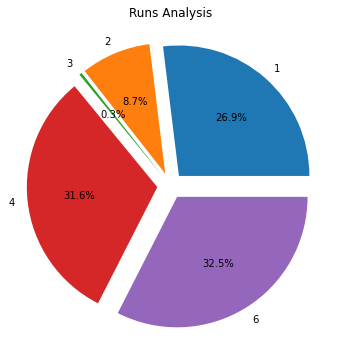

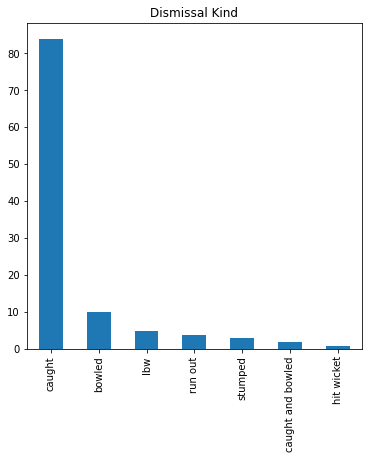

In [9]:
performance(dataframe('Yuvraj Singh'))

In [10]:
data['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [11]:
teams={
    'Sunrisers Hyderabad':'SRH', 'Royal Challengers Bangalore':'RCB',
       'Mumbai Indians':'MI', 'Rising Pune Supergiant':'RPS', 'Gujarat Lions':'GL',
       'Kolkata Knight Riders':'KKR', 'Kings XI Punjab':'KXIP', 'Delhi Daredevils':'DD',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'DC',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RIPS'
      }

data['batting_team']=data['batting_team'].map(teams)
data['bowling_team']=data['bowling_team'].map(teams)
data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,KKR,RCB


In [12]:
runs=data.groupby(['id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1,KKR,222
1,2,RCB,82
2,1,CSK,240
3,2,KXIP,207
4,1,RR,129
...,...,...,...
1592,1,MI,200
1593,1,RCB,131
1594,2,SRH,132
1595,2,SRH,172


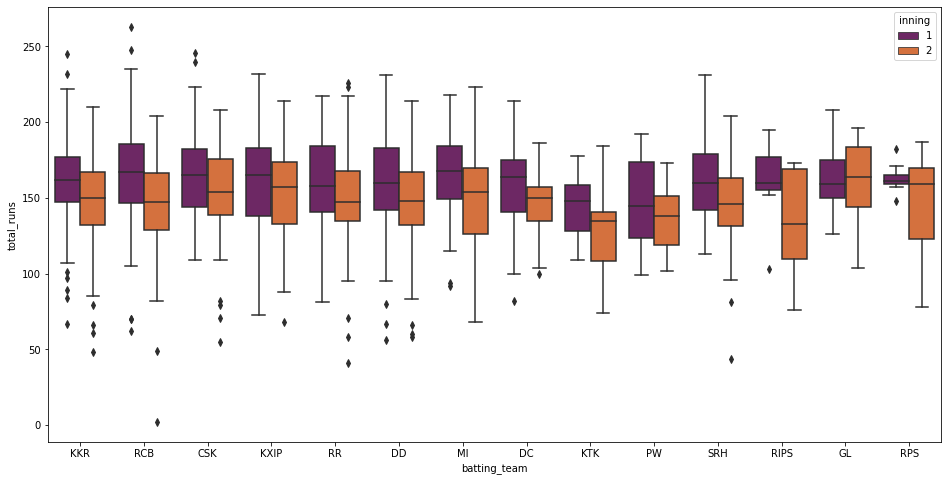

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x='batting_team',y='total_runs',data=runs,hue='inning',palette='inferno')
plt.show()


In [14]:
match=data.groupby(['id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
match[match['total_runs']>230]

,id,inning,batting_team,bowling_team,total_runs
2,335983,1,CSK,KXIP,240
292,419137,1,CSK,RR,246
398,501223,1,DD,KXIP,231
472,501260,1,KXIP,RCB,232
700,598027,1,RCB,PW,263
850,733987,1,KXIP,CSK,231
1000,829795,1,RCB,MI,235
1116,980987,1,RCB,GL,248
1354,1136604,1,KKR,KXIP,245
1402,1175366,1,SRH,RCB,231


<function matplotlib.pyplot.show(close=None, block=None)>

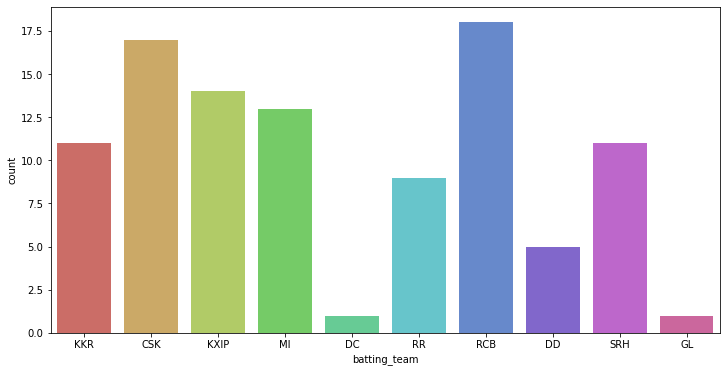

In [15]:
score_200=match[match['total_runs']>=200]
plt.figure(figsize=(12,6))
sns.countplot(x='batting_team',data=score_200,palette='hls')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

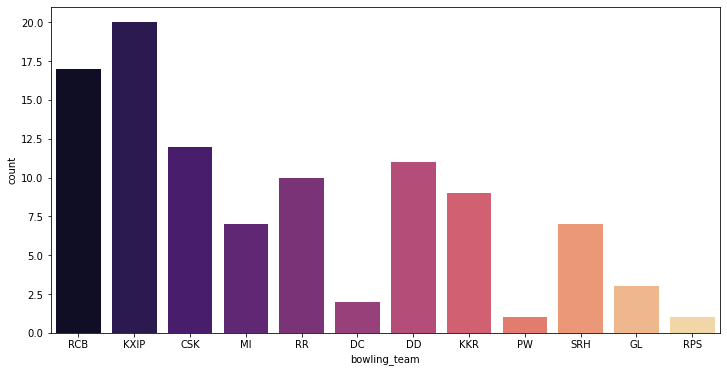

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='bowling_team',data=score_200,palette='magma')
plt.show

In [17]:
# Totals balls faced by batsman
balls=data.groupby('batsman')['ball'].count().reset_index()
balls.columns=['Batsman Name','No. of balls']

# totals runs played in IPL
runs=data.groupby('batsman')['batsman_runs'].sum().reset_index()
runs.columns=['Batsman Name','Total runs']

# No. of 4s
fours=data[data['batsman_runs']==4]
runs_4=fours.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['Batsman Name','4s']

# No. of 6s
sixes=data[data['batsman_runs']==6]
runs_6=sixes.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['Batsman Name','6s']

# Joining above tables
join1=balls.merge(runs,how='inner')
join2=join1.merge(runs_4,left_on='Batsman Name',right_on='Batsman Name',how='left')
player=join2.merge(runs_6,left_on='Batsman Name',right_on='Batsman Name',how='left')

# Adding strikerate 
player['Strikerate']=(player['Total runs']/player['No. of balls'])*100
player.fillna(0,inplace=True)
player

,Batsman Name,No. of balls,Total runs,4s,6s,Strikerate
0,A Ashish Reddy,196,280,16.0,15.0,142.857143
1,A Chandila,7,4,0.0,0.0,57.142857
2,A Chopra,75,53,7.0,0.0,70.666667
3,A Choudhary,20,25,1.0,1.0,125.000000
4,A Dananjaya,5,4,0.0,0.0,80.000000
...,...,...,...,...,...,...
532,YV Takawale,183,192,26.0,3.0,104.918033
533,Yashpal Singh,67,47,5.0,0.0,70.149254
534,Younis Khan,7,3,0.0,0.0,42.857143
535,Yuvraj Singh,2205,2750,217.0,149.0,124.716553


In [18]:
grp=data.groupby(['id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
max_runs=grp.groupby('batsman')['batsman_runs'].max().reset_index()
max_runs.columns=['Batsman Name','Maximum runs']
player=player.merge(max_runs,left_on='Batsman Name',right_on='Batsman Name',how='left')

batting=data.groupby(['id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
bat100=batting[batting['batsman_runs']>=100]
bat100=bat100.groupby('batsman')['batsman_runs'].count().reset_index()
bat100.columns=['batsman','100+']

bat50=batting[batting['batsman_runs']>=50]
bat50=bat50.groupby('batsman')['batsman_runs'].count().reset_index()
bat50.columns=['batsman','50+']

bat30=batting[batting['batsman_runs']>=30]
bat30=bat30.groupby('batsman')['batsman_runs'].count().reset_index()
bat30.columns=['batsman','30+']

bat=bat100.merge(bat50,left_on='batsman',right_on='batsman',how='right')
bat=bat.merge(bat30,left_on='batsman',right_on='batsman',how='right')
bat.fillna(0,inplace=True)
bat.columns=['Batsman Name','100+ runs','50+ runs','30+ runs']

player=player.merge(bat,left_on='Batsman Name',right_on='Batsman Name',how='left')
player.fillna(0,inplace=True)
player.set_index('Batsman Name',inplace=True)
player

,No. of balls,Total runs,4s,6s,Strikerate,Maximum runs,100+ runs,50+ runs,30+ runs
Batsman Name,,,,,,,,,
A Ashish Reddy,196,280,16.0,15.0,142.857143,36.0,0.0,0.0,2.0
A Chandila,7,4,0.0,0.0,57.142857,4.0,0.0,0.0,0.0
A Chopra,75,53,7.0,0.0,70.666667,24.0,0.0,0.0,0.0
A Choudhary,20,25,1.0,1.0,125.000000,15.0,0.0,0.0,0.0
A Dananjaya,5,4,0.0,0.0,80.000000,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
YV Takawale,183,192,26.0,3.0,104.918033,45.0,0.0,0.0,2.0
Yashpal Singh,67,47,5.0,0.0,70.149254,20.0,0.0,0.0,0.0
Younis Khan,7,3,0.0,0.0,42.857143,3.0,0.0,0.0,0.0


### Let us analyse Top 10 Batsmen having high 100+ runs

In [19]:
player.sort_values(by='100+ runs',ascending=False)[0:10]


,No. of balls,Total runs,4s,6s,Strikerate,Maximum runs,100+ runs,50+ runs,30+ runs
Batsman Name,,,,,,,,,
CH Gayle,3342,4772,384.0,349.0,142.788749,175.0,6.0,37.0,58.0
V Kohli,4609,5878,504.0,202.0,127.533087,113.0,5.0,44.0,84.0
DA Warner,3819,5254,510.0,195.0,137.575281,126.0,4.0,52.0,76.0
SR Watson,2888,3874,376.0,190.0,134.141274,117.0,4.0,25.0,52.0
AB de Villiers,3264,4849,390.0,235.0,148.560049,133.0,3.0,41.0,63.0
AM Rahane,3325,3933,416.0,76.0,118.285714,105.0,2.0,29.0,55.0
V Sehwag,1833,2728,334.0,106.0,148.827059,122.0,2.0,18.0,35.0
AC Gilchrist,1555,2069,239.0,92.0,133.054662,109.0,2.0,13.0,26.0
BA Stokes,700,920,79.0,32.0,131.428571,107.0,2.0,4.0,11.0


### Let us analyse Top 10 Batsmen having high Maximum Runs

In [20]:
player.sort_values(by='Maximum runs',ascending=False)[0:10]

,No. of balls,Total runs,4s,6s,Strikerate,Maximum runs,100+ runs,50+ runs,30+ runs
Batsman Name,,,,,,,,,
CH Gayle,3342,4772,384.0,349.0,142.788749,175.0,6.0,37.0,58.0
BB McCullum,2267,2880,293.0,130.0,127.040141,158.0,2.0,15.0,44.0
AB de Villiers,3264,4849,390.0,235.0,148.560049,133.0,3.0,41.0,63.0
KL Rahul,1990,2647,234.0,104.0,133.015075,132.0,2.0,23.0,33.0
RR Pant,1416,2079,184.0,103.0,146.822034,128.0,1.0,9.0,19.0
M Vijay,2208,2619,247.0,91.0,118.614130,127.0,2.0,15.0,36.0
DA Warner,3819,5254,510.0,195.0,137.575281,126.0,4.0,52.0,76.0
V Sehwag,1833,2728,334.0,106.0,148.827059,122.0,2.0,18.0,35.0
PC Valthaty,432,505,61.0,20.0,116.898148,120.0,1.0,3.0,5.0


### Top 10 batsmen having Highest Total runs

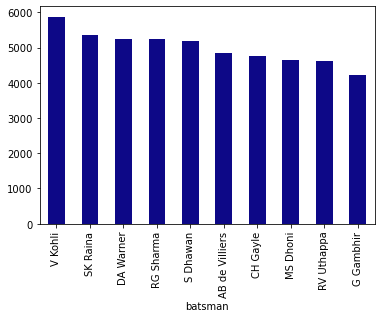

In [21]:
bat=data.groupby('batsman')['batsman_runs'].sum()
bat.sort_values(ascending=False)[:10].plot(kind='bar',cmap='plasma')
plt.show()

In [22]:
data['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

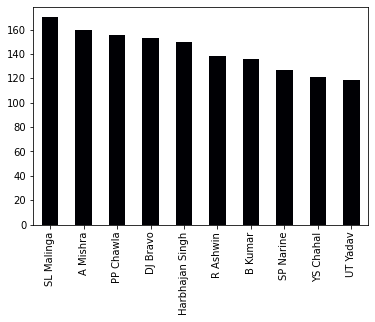

In [23]:
dismissal_kind=['caught', 'bowled', 'lbw', 'caught and bowled','stumped', 'hit wicket']

# Highest wicket taker 
hwt=data[data['dismissal_kind'].isin(dismissal_kind)]
hwt['bowler'].value_counts()[0:10].plot(kind='bar',cmap='inferno')
plt.show()

In [24]:
bow=data.groupby(['id','bowling_team','bowler','over'])['total_runs'].sum().reset_index()
bow1=data.groupby('bowler')['total_runs'].sum().reset_index()
bow2=data.groupby('bowler')['ball'].count().reset_index()
bowler=bow1.merge(bow2,how='inner')
bowler

,bowler,total_runs,ball
0,A Ashish Reddy,400,270
1,A Chandila,245,234
2,A Choudhary,144,108
3,A Dananjaya,47,25
4,A Flintoff,106,66
...,...,...,...
415,YA Abdulla,311,222
416,YK Pathan,1443,1184
417,YS Chahal,2782,2188
418,Yuvraj Singh,1091,882


In [25]:
bowler['overs']=(bowler['ball']/6)
bowler['economy']=(bowler['total_runs']/bowler['overs'])
total_wickets=hwt.groupby('bowler')['dismissal_kind'].count().reset_index()
bowler=bowler.merge(total_wickets,left_on='bowler',right_on='bowler',how='left')
bowler

,bowler,total_runs,ball,overs,economy,dismissal_kind
0,A Ashish Reddy,400,270,45.000000,8.888889,18.0
1,A Chandila,245,234,39.000000,6.282051,11.0
2,A Choudhary,144,108,18.000000,8.000000,5.0
3,A Dananjaya,47,25,4.166667,11.280000,NaN
4,A Flintoff,106,66,11.000000,9.636364,2.0
...,...,...,...,...,...,...
415,YA Abdulla,311,222,37.000000,8.405405,15.0
416,YK Pathan,1443,1184,197.333333,7.312500,42.0
417,YS Chahal,2782,2188,364.666667,7.628885,121.0
418,Yuvraj Singh,1091,882,147.000000,7.421769,36.0


In [26]:
maid=data.groupby(['id','bowler','over'])['total_runs'].sum().reset_index()
maid=maid[maid['total_runs']==0]
maidens=maid.groupby(['bowler'])['total_runs'].count().reset_index()
maidens.columns=['bowler','no. of maidens']
Bowler=bowler.merge(maidens,left_on='bowler',right_on='bowler',how='left')
Bowler.columns=['Name','Total_runs','No. of Balls','Overs','Economy','Wickets','No. of Maiden Over']
Bowler.set_index('Name',inplace=True)
Bowler.fillna(0,axis=1,inplace=True)
Bowler


,Total_runs,No. of Balls,Overs,Economy,Wickets,No. of Maiden Over
Name,,,,,,
A Ashish Reddy,400,270,45.000000,8.888889,18.0,0.0
A Chandila,245,234,39.000000,6.282051,11.0,0.0
A Choudhary,144,108,18.000000,8.000000,5.0,2.0
A Dananjaya,47,25,4.166667,11.280000,0.0,0.0
A Flintoff,106,66,11.000000,9.636364,2.0,0.0
...,...,...,...,...,...,...
YA Abdulla,311,222,37.000000,8.405405,15.0,1.0
YK Pathan,1443,1184,197.333333,7.312500,42.0,1.0
YS Chahal,2782,2188,364.666667,7.628885,121.0,3.0


### 10 most expensive bowler in IPL

In [27]:
Bowler.sort_values(by='Economy',ascending=False)[0:10]

,Total_runs,No. of Balls,Overs,Economy,Wickets,No. of Maiden Over
Name,,,,,,
I Malhotra,23,6,1.000000,23.000000,0.0,0.0
LPC Silva,21,6,1.000000,21.000000,0.0,0.0
B Chipli,20,6,1.000000,20.000000,0.0,0.0
SN Khan,6,2,0.333333,18.000000,0.0,0.0
P Prasanth,18,6,1.000000,18.000000,0.0,0.0
RR Bhatkal,35,12,2.000000,17.500000,0.0,0.0
CK Kapugedera,49,17,2.833333,17.294118,0.0,0.0
S Sriram,49,18,3.000000,16.333333,0.0,0.0
F du Plessis,16,6,1.000000,16.000000,0.0,0.0


### Having High Meadins

In [28]:
Bowler.sort_values(by='No. of Maiden Over',ascending=False)[0:10]

,Total_runs,No. of Balls,Overs,Economy,Wickets,No. of Maiden Over
Name,,,,,,
P Kumar,3342,2637,439.500000,7.604096,90.0,12.0
IK Pathan,2711,2113,352.166667,7.698060,80.0,9.0
SL Malinga,3486,2974,495.666667,7.032952,170.0,8.0
DW Steyn,2568,2276,379.333333,6.769772,97.0,8.0
B Kumar,3333,2795,465.833333,7.154919,136.0,7.0
DS Kulkarni,2465,1850,308.333333,7.994595,86.0,7.0
DJ Bravo,3869,2846,474.333333,8.156711,153.0,6.0
Sandeep Sharma,2686,2128,354.666667,7.573308,109.0,6.0
Z Khan,2860,2276,379.333333,7.539543,102.0,5.0


In [29]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [30]:
matches['team1']=matches['team1'].map(teams)
matches['team2']=matches['team2'].map(teams)
matches['toss_winner']=matches['toss_winner'].map(teams)
matches['winner']=matches['winner'].map(teams)
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,DC,DC,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan


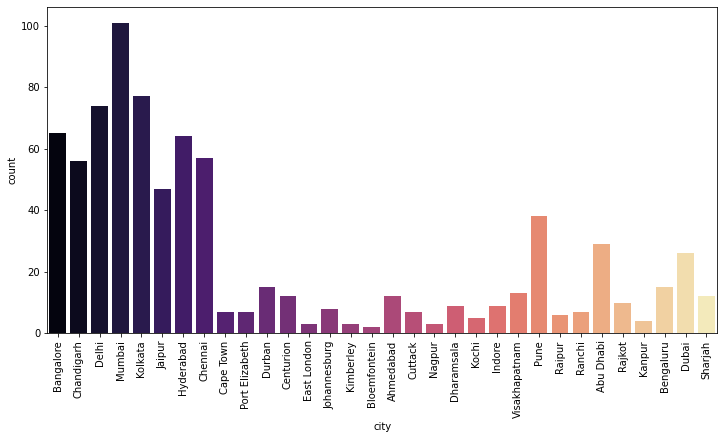

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='city',data=matches,palette='magma')
plt.xticks(rotation='vertical')
plt.show()

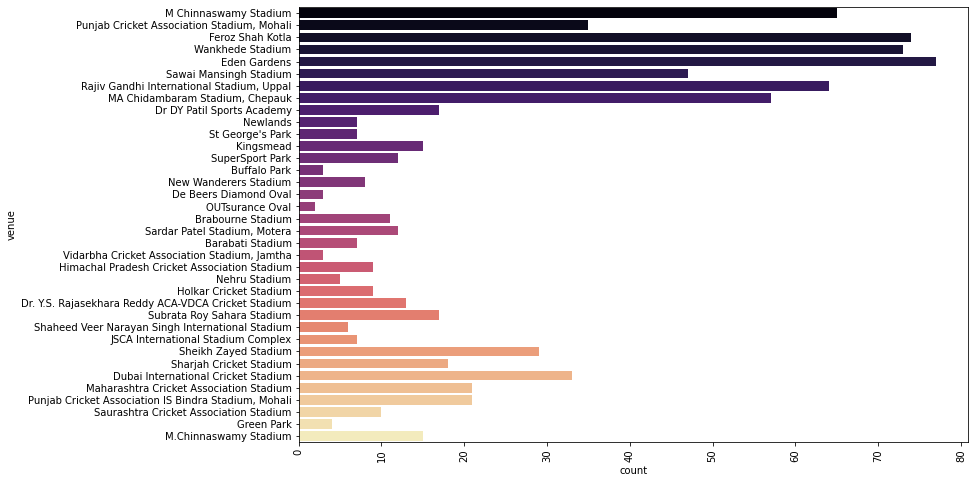

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(y='venue',data=matches,palette='magma')
plt.xticks(rotation='vertical')
plt.show()

### Player of Match

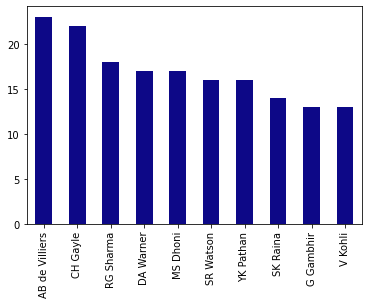

In [33]:
matches['player_of_match'].value_counts()[:10].plot(kind='bar',cmap='plasma')
plt.show()

In [34]:
win_by_runs=matches[matches['result']=='runs']
win_by_runs[win_by_runs['result_margin']>=100]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
55,336038,Mumbai,2008-05-30,SR Watson,Wankhede Stadium,0,DD,RR,DD,field,RR,runs,105.0,N,NaN,BF Bowden,RE Koertzen
236,501260,Dharamsala,2011-05-17,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,0,KXIP,RCB,KXIP,bat,KXIP,runs,111.0,N,NaN,Asad Rauf,AM Saheba
351,598027,Bangalore,2013-04-23,CH Gayle,M Chinnaswamy Stadium,0,RCB,PW,PW,field,RCB,runs,130.0,N,NaN,Aleem Dar,C Shamshuddin
497,829785,Bangalore,2015-05-06,CH Gayle,M Chinnaswamy Stadium,0,RCB,KXIP,KXIP,field,RCB,runs,138.0,N,NaN,RK Illingworth,VA Kulkarni
560,980987,Bangalore,2016-05-14,AB de Villiers,M Chinnaswamy Stadium,0,RCB,GL,GL,field,RCB,runs,144.0,N,NaN,AY Dandekar,VK Sharma
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,DD,MI,DD,field,MI,runs,146.0,N,NaN,Nitin Menon,CK Nandan
676,1136601,Kolkata,2018-05-09,Ishan Kishan,Eden Gardens,0,KKR,MI,KKR,field,MI,runs,102.0,N,NaN,KN Ananthapadmanabhan,AK Chaudhary
706,1175366,Hyderabad,2019-03-31,JM Bairstow,"Rajiv Gandhi International Stadium, Uppal",0,SRH,RCB,RCB,field,SRH,runs,118.0,N,NaN,KN Ananthapadmanabhan,S Ravi


In [35]:
win_by_wickets=matches[matches['result']=='wickets']
win_by_wickets[win_by_wickets['result_margin']==10]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
12,335994,Mumbai,2008-04-27,AC Gilchrist,Dr DY Patil Sports Academy,0,MI,DC,DC,field,DC,wickets,10.0,N,NaN,Asad Rauf,SL Shastri
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,DD,KXIP,DD,field,DD,wickets,10.0,N,D/L,MR Benson,SD Ranade
124,419115,Bangalore,2010-03-18,JH Kallis,M Chinnaswamy Stadium,0,RCB,RR,RCB,field,RCB,wickets,10.0,N,NaN,K Hariharan,DJ Harper
239,501263,Mumbai,2011-05-20,SR Watson,Wankhede Stadium,0,MI,RR,MI,bat,RR,wickets,10.0,N,NaN,RE Koertzen,PR Reiffel
317,548377,Jaipur,2012-05-20,DR Smith,Sawai Mansingh Stadium,0,RR,MI,RR,bat,MI,wickets,10.0,N,NaN,HDPK Dharmasena,C Shamshuddin
331,598007,Chandigarh,2013-04-10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,field,CSK,wickets,10.0,N,NaN,Aleem Dar,C Shamshuddin
483,829757,Delhi,2015-04-26,VR Aaron,Feroz Shah Kotla,0,DD,RCB,RCB,field,RCB,wickets,10.0,N,NaN,M Erasmus,S Ravi
531,980929,Rajkot,2016-04-21,B Kumar,Saurashtra Cricket Association Stadium,0,GL,SRH,SRH,field,SRH,wickets,10.0,N,NaN,K Bharatan,HDPK Dharmasena
579,1082593,Rajkot,2017-04-07,CA Lynn,Saurashtra Cricket Association Stadium,0,GL,KKR,KKR,field,KKR,wickets,10.0,N,NaN,Nitin Menon,CK Nandan
611,1082626,Chandigarh,2017-04-30,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",0,KXIP,DD,KXIP,field,KXIP,wickets,10.0,N,NaN,YC Barde,CK Nandan


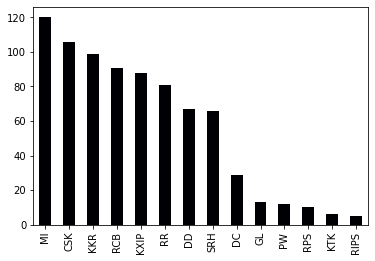

In [36]:
matches['winner'].value_counts().plot(kind='bar',cmap='magma')
plt.show()

In [37]:
matches['season']=pd.DatetimeIndex(matches['date']).year

matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,DC,DC,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,MI,MI,field,RCB,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,MI,NaN,NaN,field,MI,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,SRH,SRH,field,SRH,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,NaN,SRH,NaN,bat,NaN,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


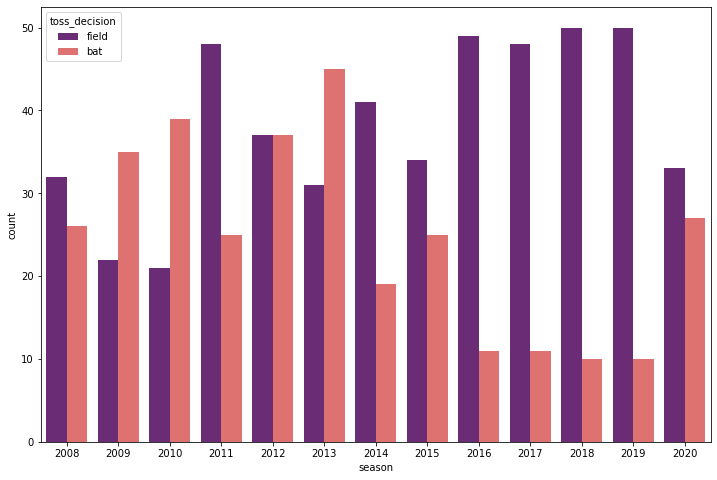

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x='season',hue='toss_decision',data=matches,palette='magma')
plt.show()

In [39]:
temp=(matches['team1'].value_counts()+matches['team2'].value_counts()).reset_index()
temp.columns=['Team Name','Total Matches']

win=matches['winner'].value_counts().reset_index()
win.columns=['Team Name','Total matches winned']

total_summary=temp.merge(win,how='inner')
total_summary

,Team Name,Total Matches,Total matches winned
0,CSK,178,106
1,DC,75,29
2,DD,161,67
3,GL,30,13
4,KKR,192,99
5,KTK,14,6
6,KXIP,190,88
7,MI,203,120
8,PW,46,12
9,RCB,195,91


## Total Matches vs Wining Matches 

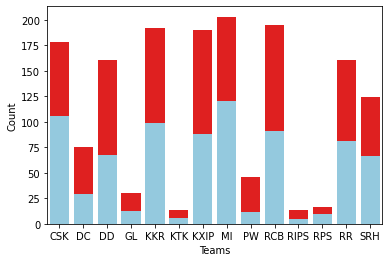

In [40]:
ax=plt.subplots()
  
#plotting columns
ax=sns.barplot(y=total_summary['Total Matches'], x=total_summary['Team Name'], data=total_summary,color = 'red')
ax=sns.barplot(y=total_summary['Total matches winned'], x=total_summary['Team Name'], data=total_summary,color = 'skyblue')
  
#renaming the axes
ax.set(xlabel="Teams", ylabel="Count")


# visulaizing illustration
plt.show()


## Total Runs Analysis

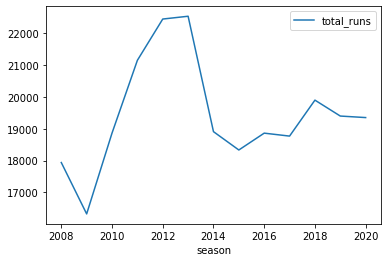

In [41]:
season=matches[['id','season']].merge(data,left_on='id',right_on='id',how='left').drop('id',axis=1)
season1=season.groupby('season')['total_runs'].sum().reset_index()
season1.set_index('season',inplace=True)
season1.plot()
plt.show()

## Lucky Venue

In [42]:
def lucky_venue(df,team):
    return matches[matches['winner']==team]['venue'].value_counts().nlargest(3)



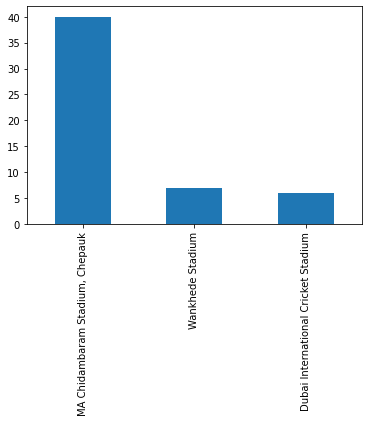

In [43]:
lucky_venue(matches,'CSK').plot(kind='bar')
plt.show()

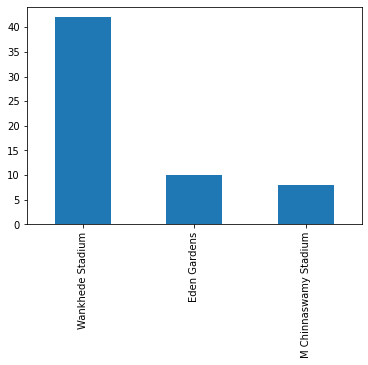

In [44]:
lucky_venue(matches,'MI').plot(kind='bar')
plt.show()

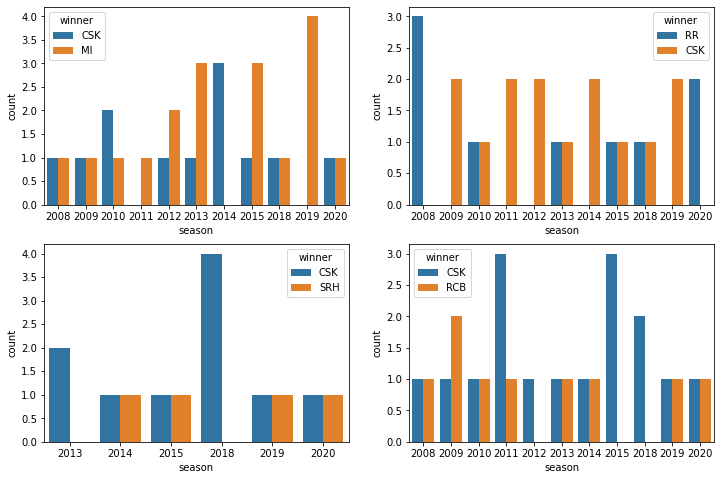

In [45]:
df=matches
def comparison(team1,team2):
    compare=df[((df['team1']==team1)|(df['team2']==team1))&((df['team1']==team2)|(df['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=compare)

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
comparison('CSK','MI')

plt.subplot(2,2,2)
comparison('CSK','RR')

plt.subplot(2,2,3)
comparison('CSK','SRH')

plt.subplot(2,2,4)
comparison('CSK','RCB')


## Point Table

In [46]:
def season(year,df):
    return df[df['season']==year]

def table(df):
    a=df['winner'].value_counts().reset_index()
    b=df['team1'].value_counts().reset_index()
    c=df['team2'].value_counts().reset_index()
    b=b.merge(c,how='inner')
    b=b.merge(a,how='inner')
    b['total_matches']=b['team1']+b['team2']
    b=b.drop(['team1','team2'],axis=1)
    b['loss']=b['total_matches']-b['winner']
    b['points']=b['winner']*2
    b.columns=['Team','Total_matches','Win','Loss','Points']
    return b.set_index('Team').sort_values(by='Points',ascending=False)    

In [47]:
table(season(2016,matches))

,Total_matches,Win,Loss,Points
Team,,,,
SRH,11,17,6,22
GL,9,16,7,18
RCB,9,16,7,18
KKR,8,15,7,16
MI,7,14,7,14
DD,7,14,7,14
RIPS,5,14,9,10
KXIP,4,14,10,8


In [48]:
table(season(2020,matches))

,Total_matches,Win,Loss,Points
Team,,,,
MI,11,16,5,22
SRH,8,16,8,16
KKR,7,14,7,14
RCB,7,15,8,14
KXIP,6,14,8,12
CSK,6,14,8,12
RR,6,14,8,12


## Orange Cap Holder

In [49]:
Season=matches[['id','season']].merge(data,left_on='id',right_on='id',how='left').drop('id',axis=1)

def season(year,df):
    return df[df['season']==year]

def orange(df):
    a=df.groupby(['batsman'])['ball'].count().reset_index()
    b=df.groupby(['batsman'])['total_runs'].sum().reset_index()
    orange=a.merge(b,how='inner')
    orange=orange.sort_values(by='total_runs',ascending=False)[0:1]
    orange.set_index('batsman',inplace=True)
    return orange


In [50]:
orange(season(2020,Season))

,ball,total_runs
batsman,,
KL Rahul,525,690


In [51]:
orange(season(2019,Season))

,ball,total_runs
batsman,,
DA Warner,496,727


## Purple Cap Holder

In [52]:
def purple(df):
    a=df.groupby(['bowler'])['dismissal_kind'].count().reset_index()
    a=a.sort_values(by='dismissal_kind',ascending=False)[0:1]
    a.set_index('bowler',inplace=True)
    a.columns=['Wickets']
    return a

In [53]:
purple(season(2020,Season))

,Wickets
bowler,
K Rabada,30


In [54]:
purple(season(2019,Season))

,Wickets
bowler,
K Rabada,28
